In [1]:
!nvidia-smi

Fri Jun 28 09:39:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4ZQ2GRG22mUeqtXFX26n")
project = rf.workspace("implant-system-identification").project("implant-system-detection")
version = project.version(4)
dataset = version.download("yolov8")


/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 986.5 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 29.3 MB/s eta 0:00:00:00:010:01m
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4


Extracting Dataset Version Zip to IMPLANT-SYSTEM-DETECTION-4 in yolov8:: 100%|██████████| 25570/25570 [00:03<00:00, 7228.88it/s] 


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 imgsz=640 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 159MB/s]
New https://pypi.org/project/ultralytics/8.2.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-4/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=F

In [9]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  results.png
PR_curve.png					  train_batch0.jpg
P_curve.png					  train_batch1.jpg
R_curve.png					  train_batch2.jpg
args.yaml					  val_batch0_labels.jpg
confusion_matrix.png				  val_batch0_pred.jpg
confusion_matrix_normalized.png			  val_batch1_labels.jpg
events.out.tfevents.1719567715.8ce54bd8413e.84.0  val_batch1_pred.jpg
labels.jpg					  val_batch2_labels.jpg
labels_correlogram.jpg				  val_batch2_pred.jpg
results.csv					  weights


/kaggle/working


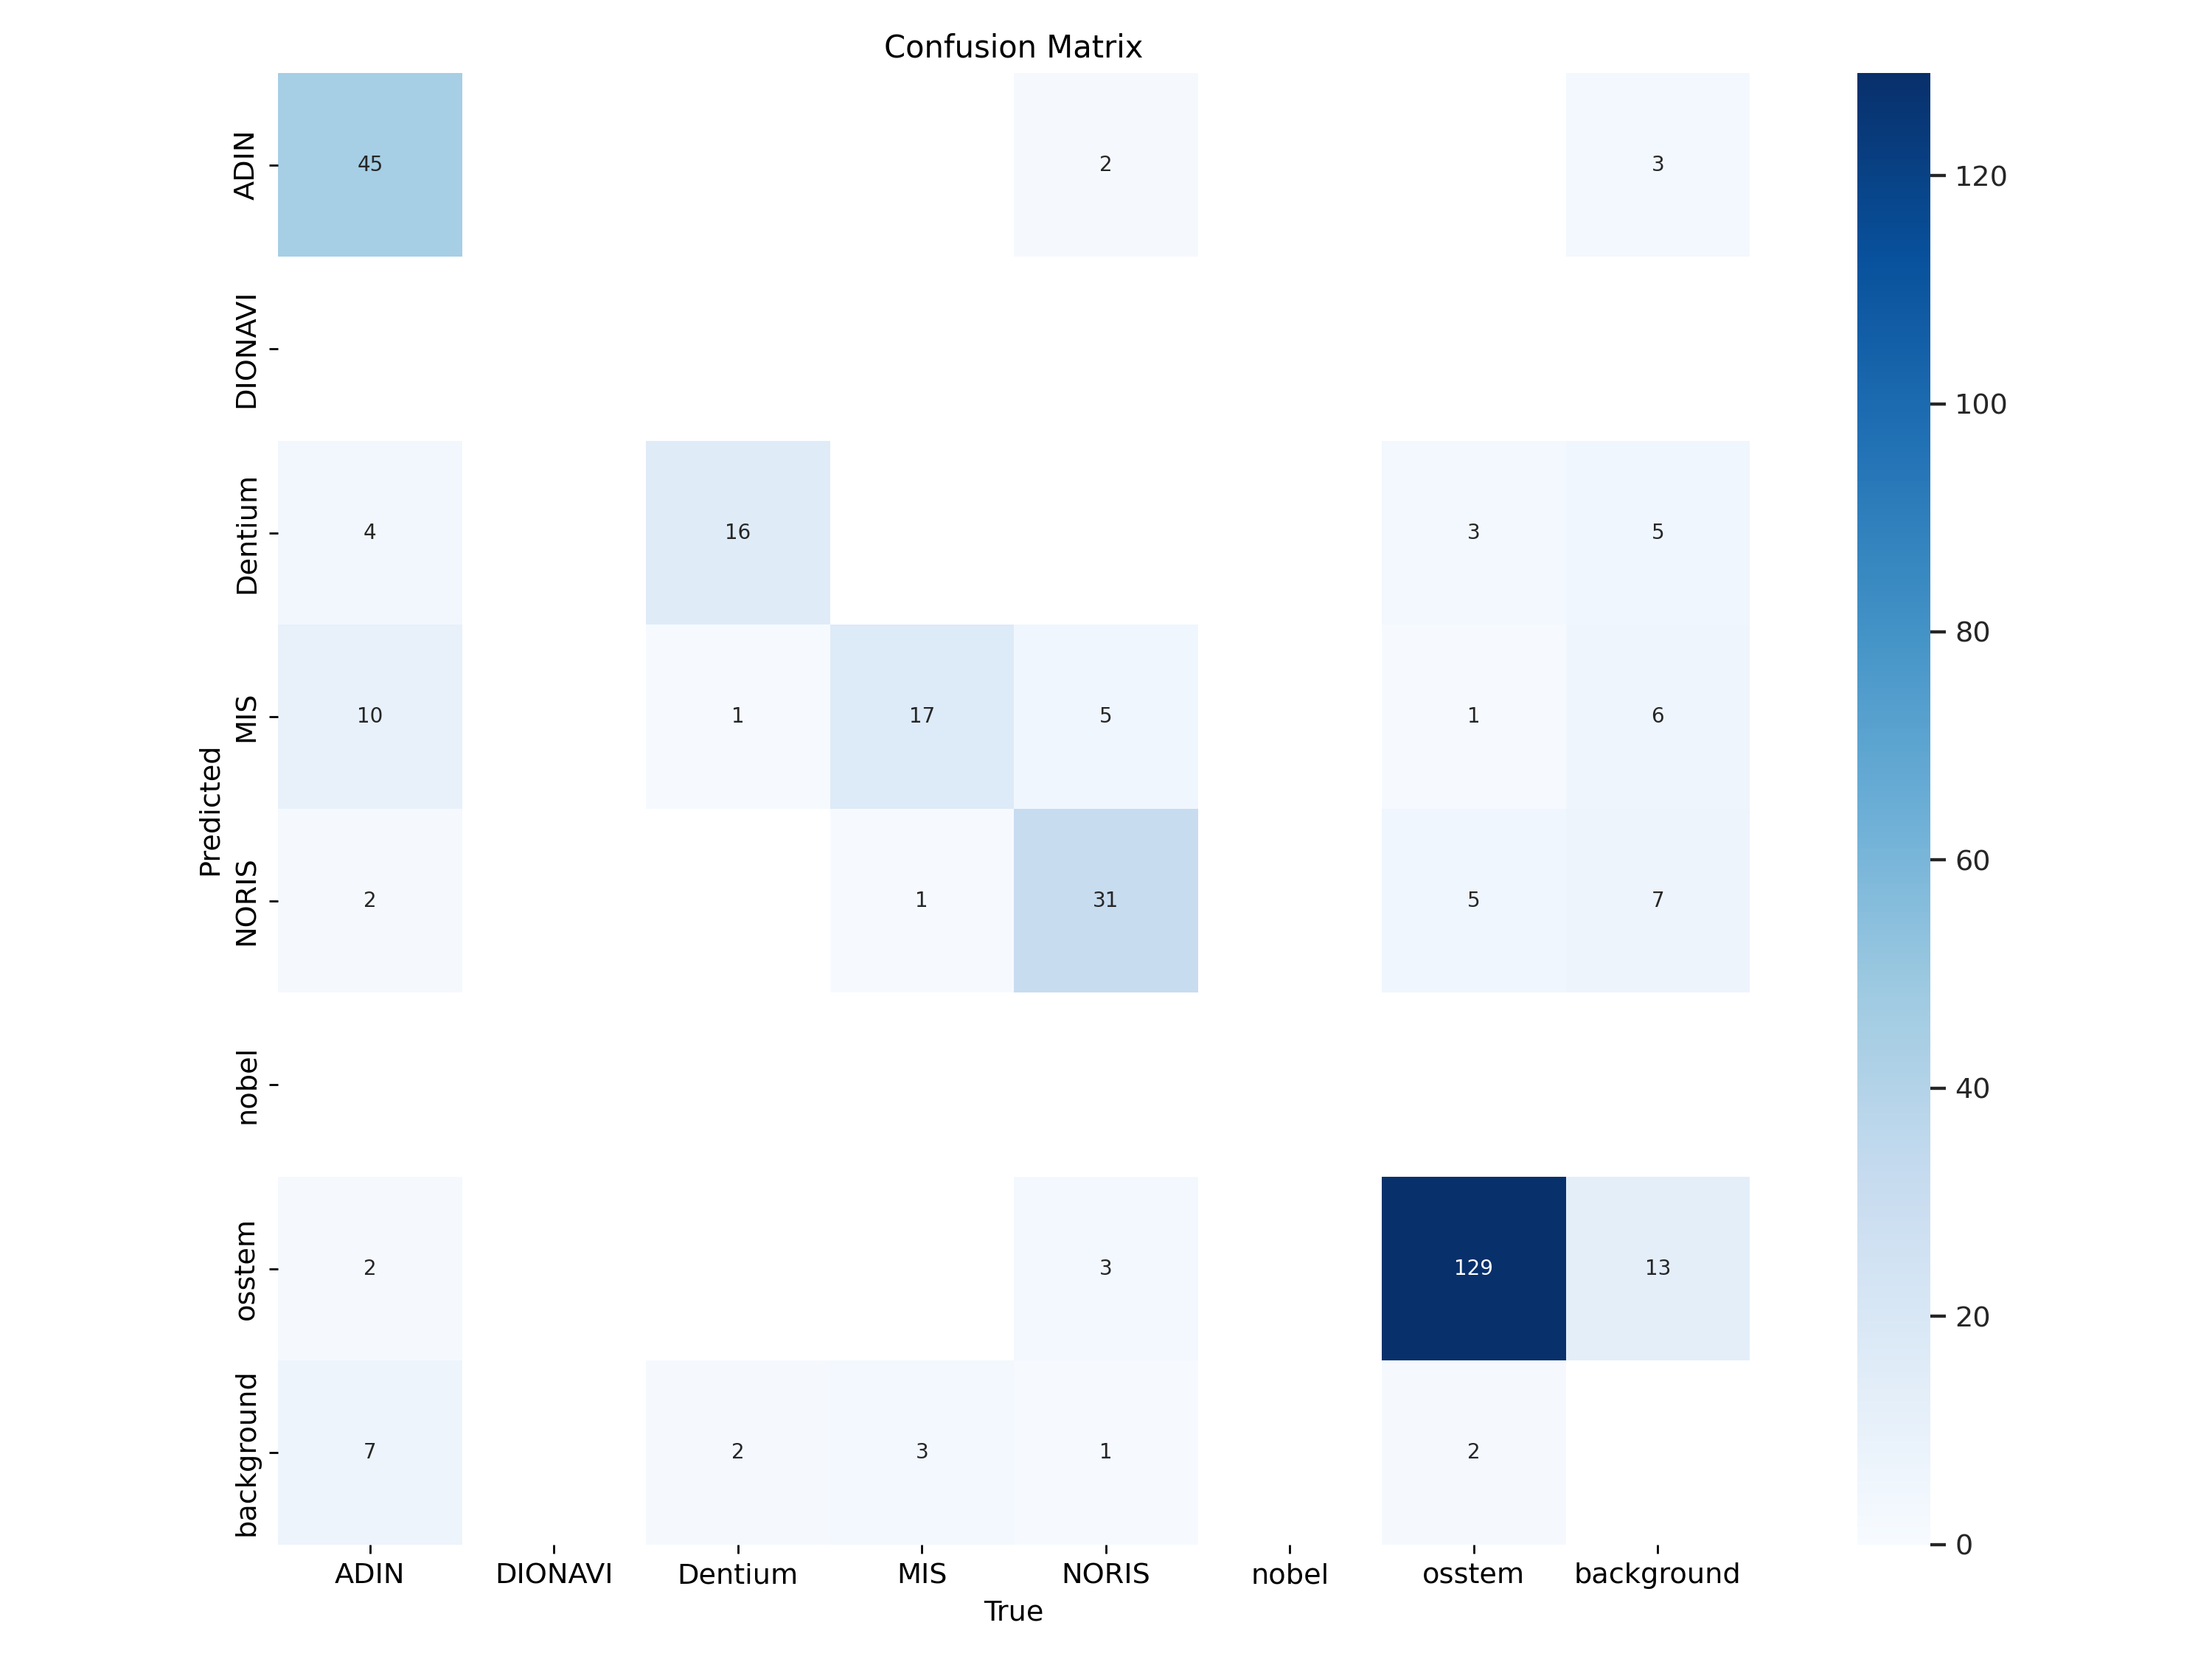

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


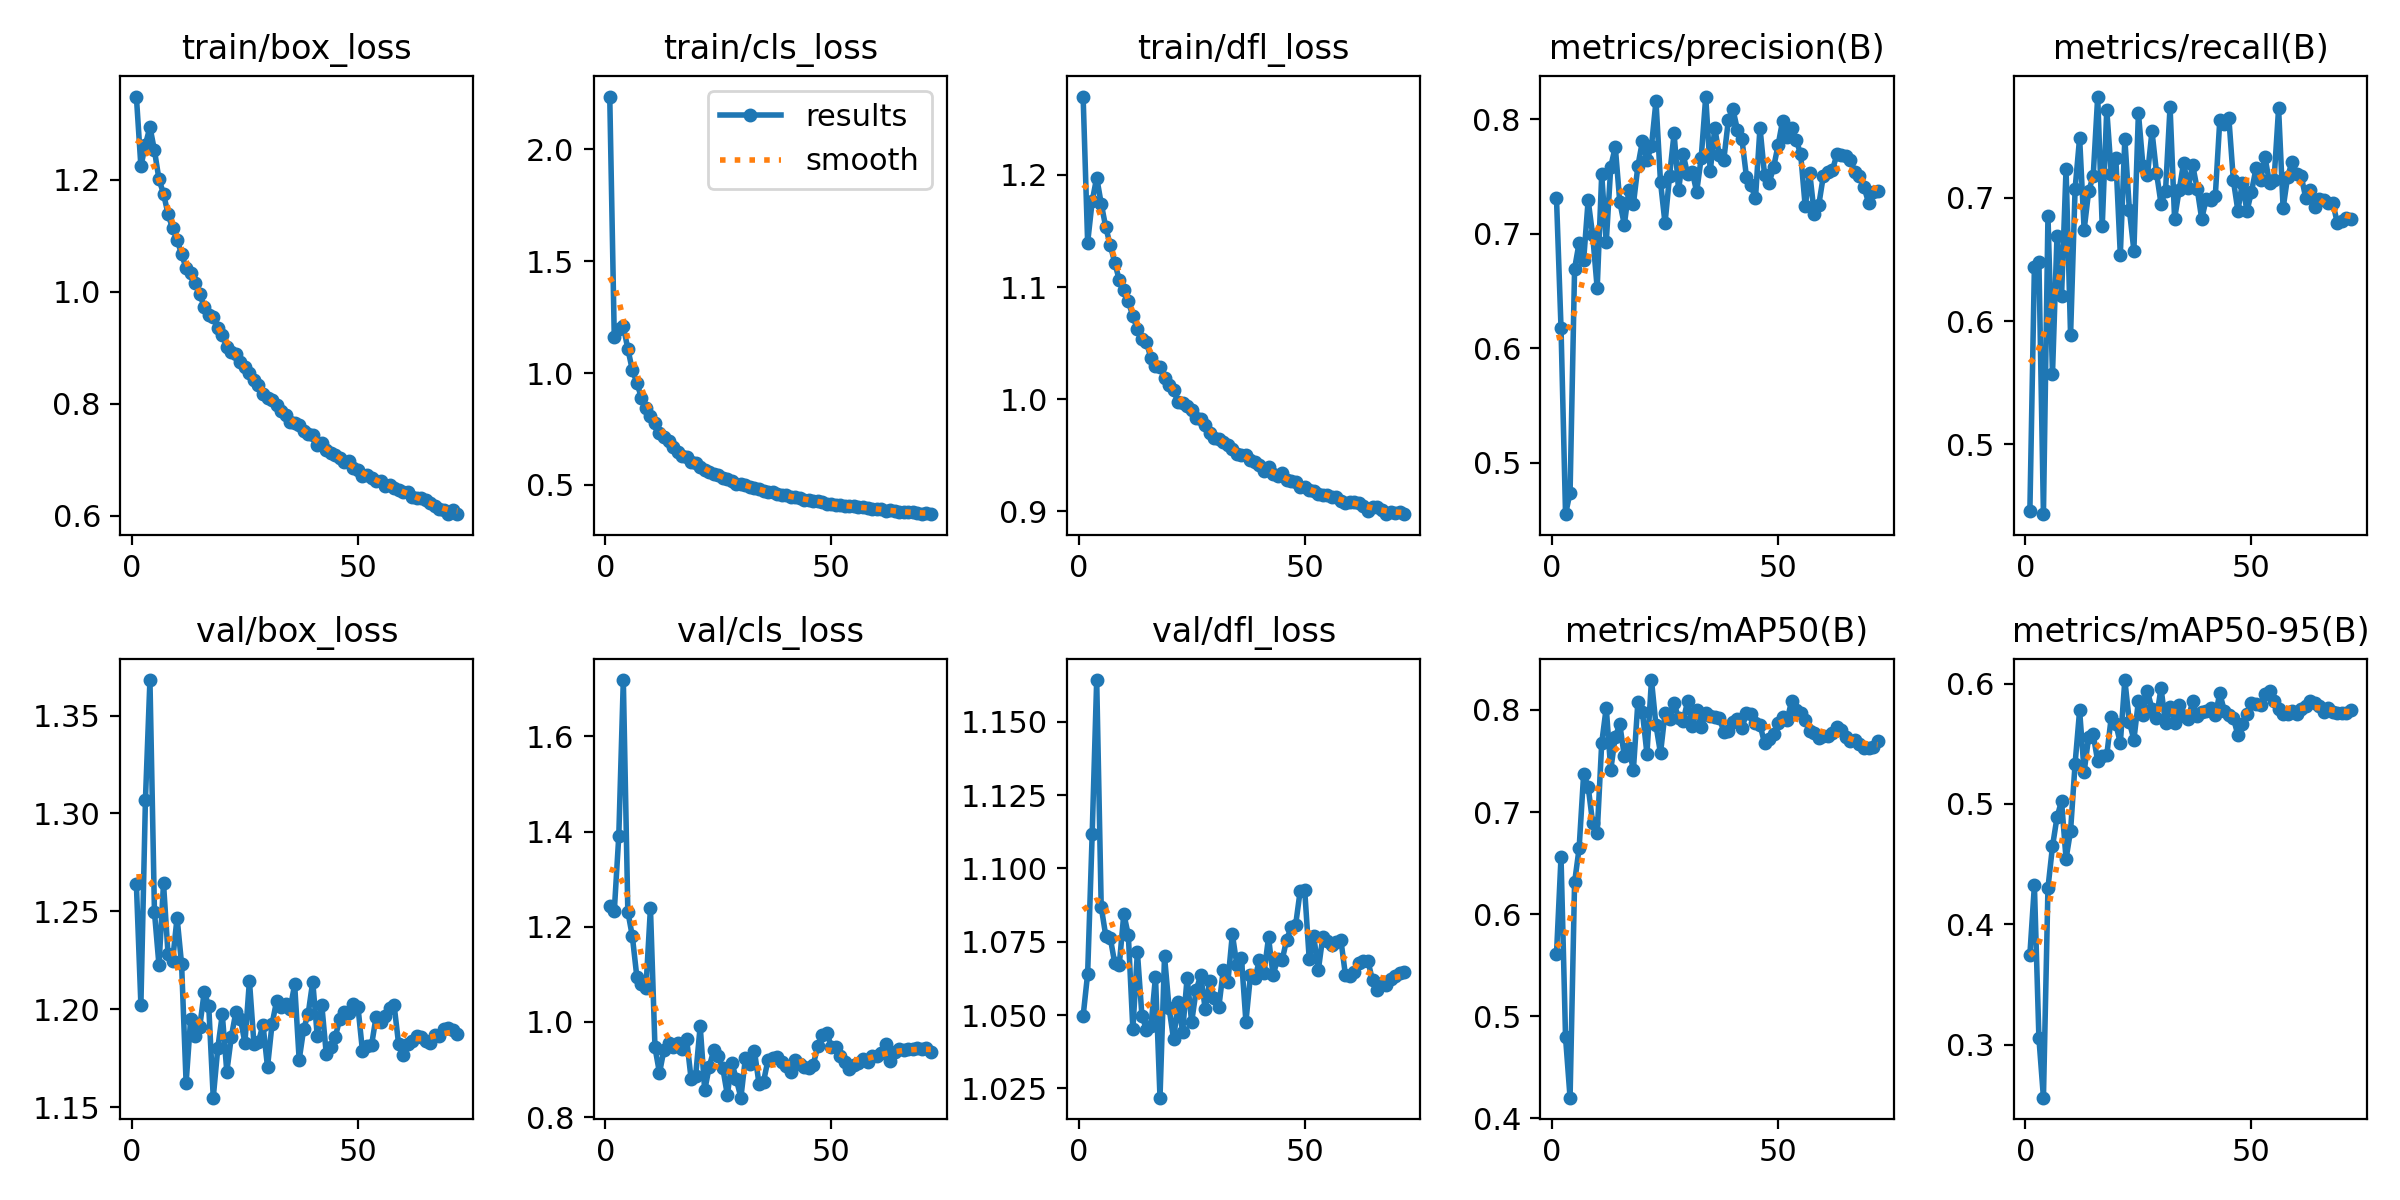

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


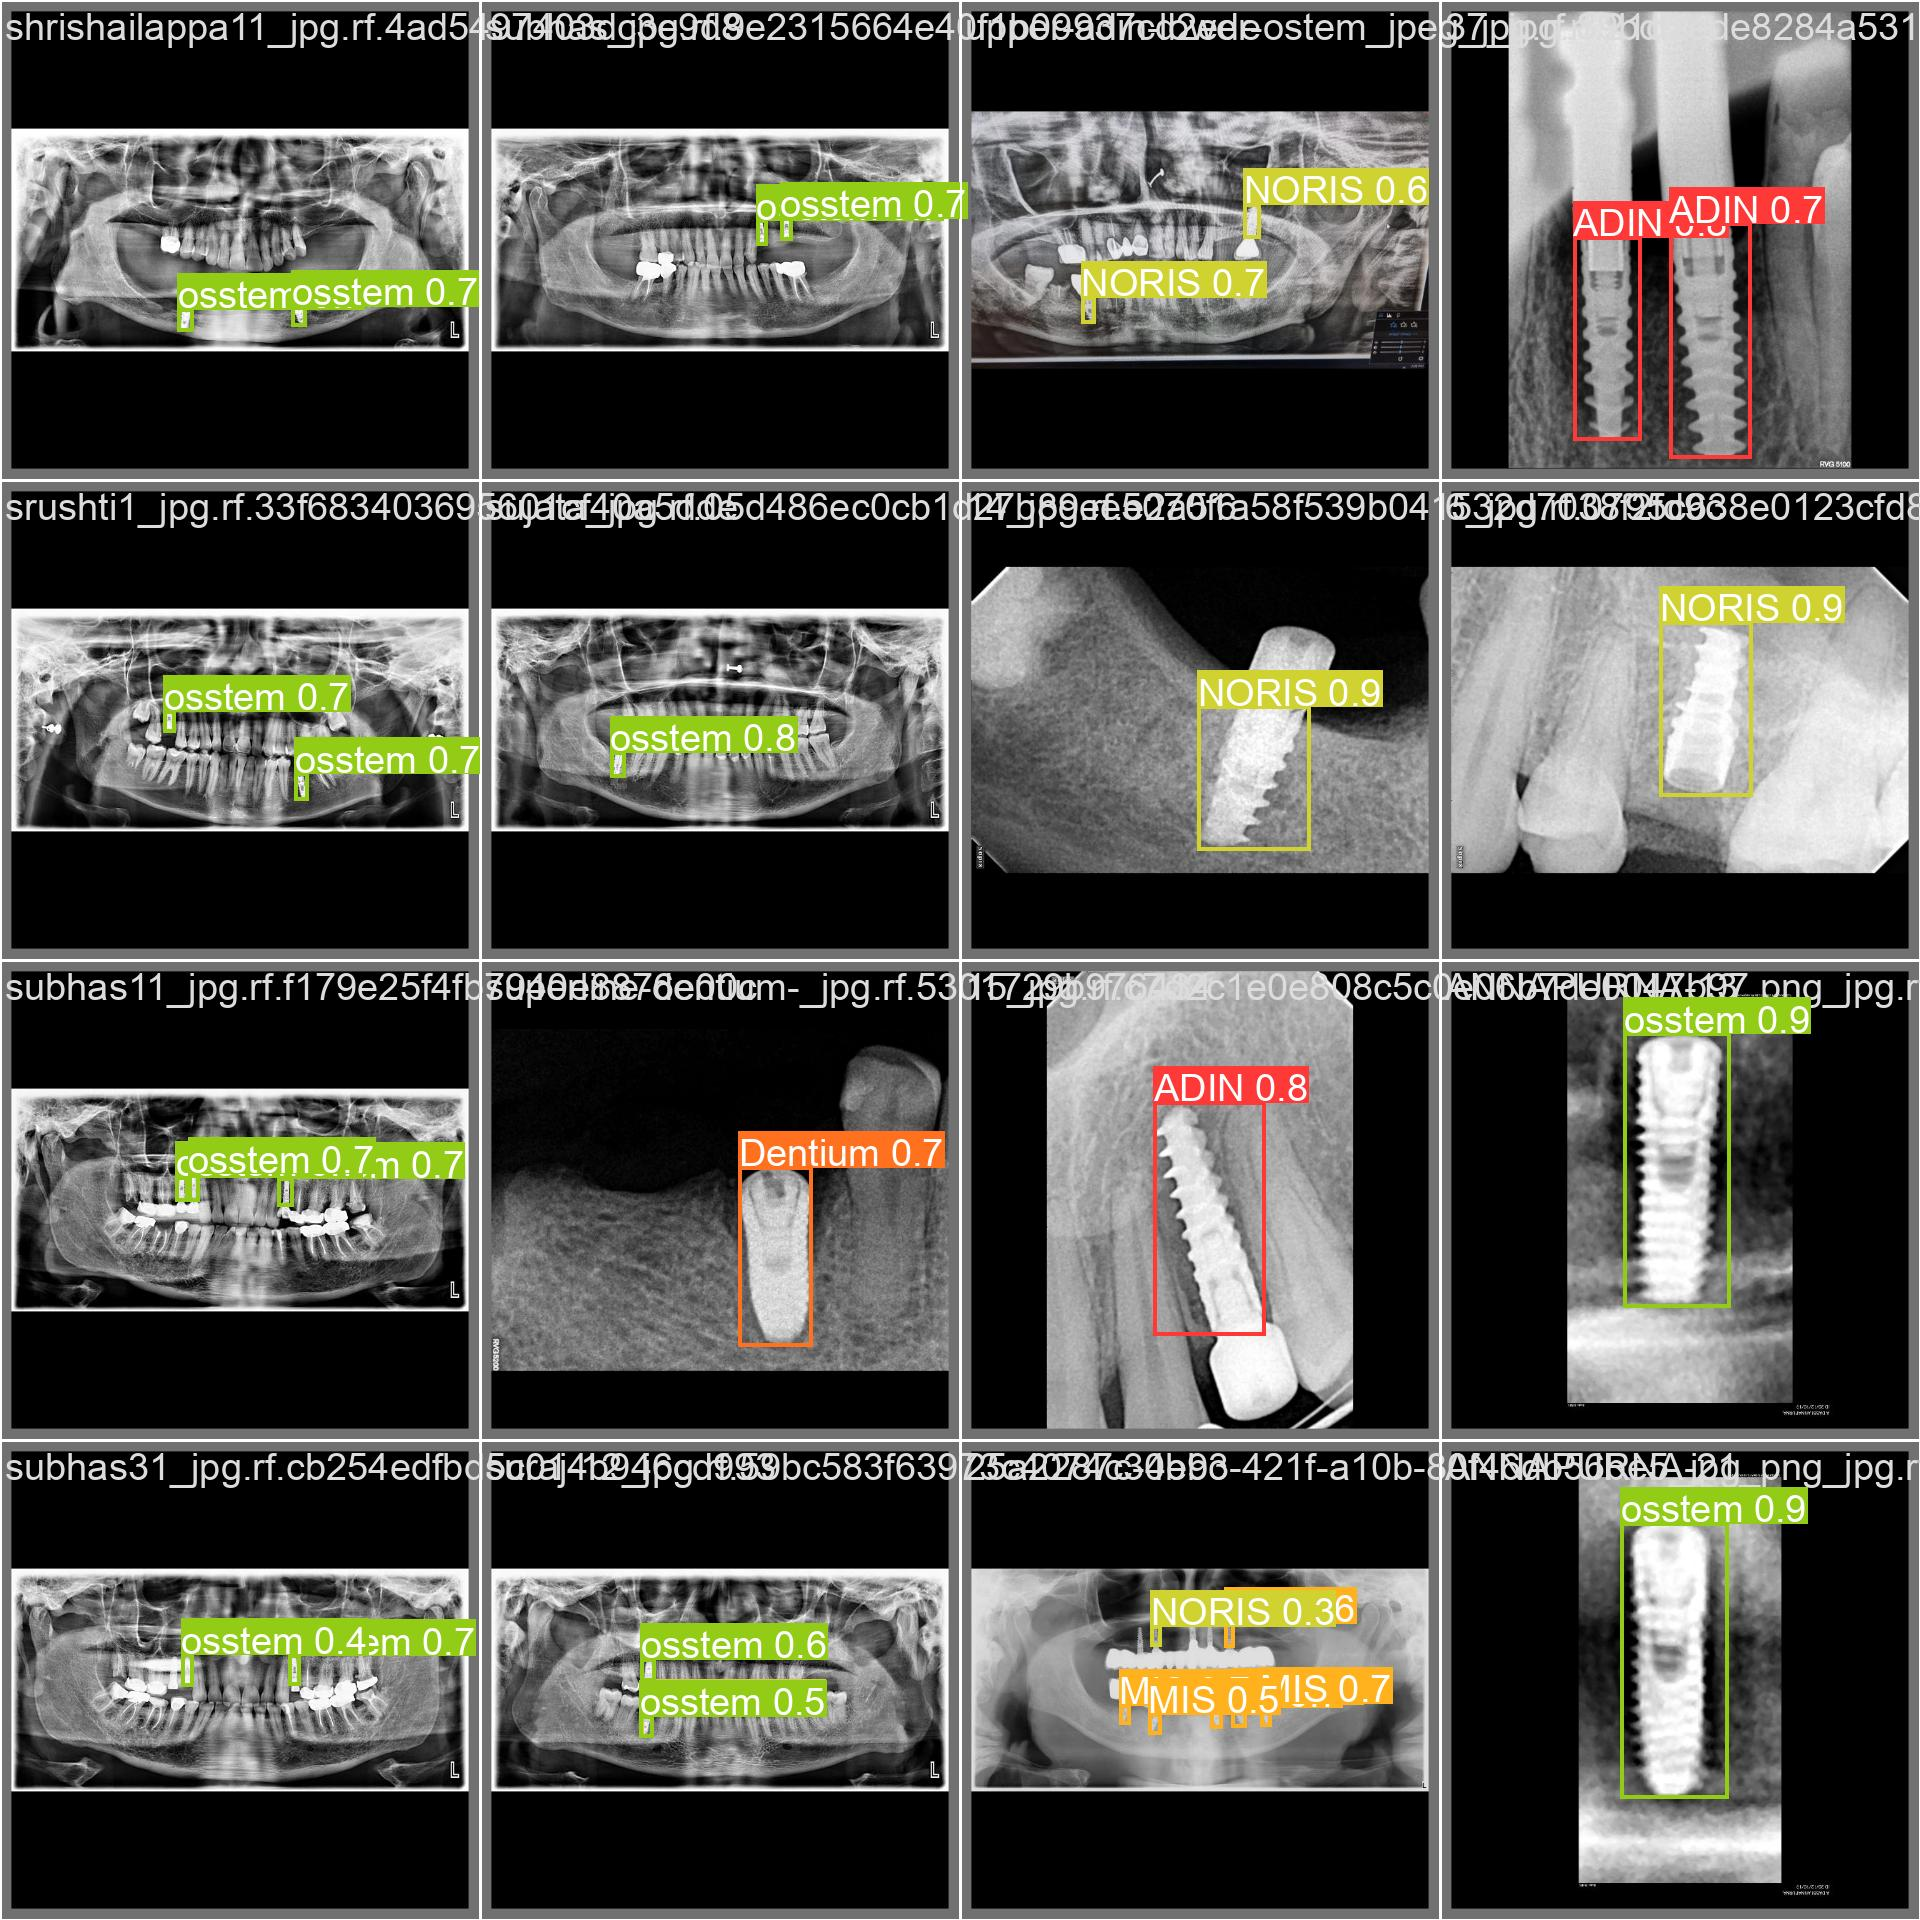

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/datasets/IMPLANT-SYSTEM-DETECTION-4/valid/labels.c
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 292. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        155        292      0.777      0.748      0.829      0.603
                  ADIN        155         70      0.887      0.614      0.772      0.526
               Dentium        155         19      0.727      0.895      0.762      0.626
                   MIS        155         21      0.558      0.714      0.835      0.661
                 NORIS        155

In [14]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/implant-system-identification/implant-system-detection/4
Share your model with the world at: https://universe.roboflow.com/implant-system-identification/implant-system-detection/model/4
